# `44-Linear Regression medical Cost Dataset`

# 1. Import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# 2. Get the Data

In [3]:
ins = pd.read_csv("insurance.csv")

In [4]:
ins.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
ins.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [6]:
ins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
ins.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
ins.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### 2.1 Data Preprocessing

##### 2.1.2 Encoding Categorical Features

In [20]:
from sklearn.preprocessing import LabelEncoder

cols = ['sex', 'smoker', 'region']

encoders = {}
for col in cols:
    le = LabelEncoder()
    ins[col] = le.fit_transform(ins[col])
    encoders[col] = le
    
ins.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


# 3. Explore Data Insights

In [23]:
sns.set_palette("Set1", 8, 0.75)
sns.set_style("darkgrid")

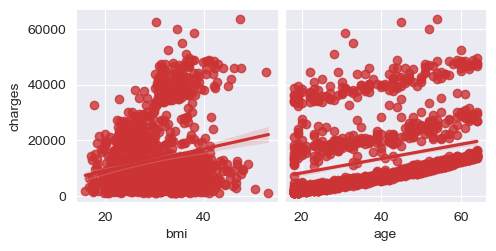

In [27]:
sns.pairplot(ins, x_vars=['bmi', 'age'], y_vars='charges', kind='reg')
plt.show()

# 4. Training and Testing Dataset

In [30]:
ins.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [32]:
X = ins.drop('charges', axis=1)
y = ins['charges']

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=43)

### Training Model

In [39]:
from sklearn.linear_model import LinearRegression

In [41]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [43]:
y_pred = model.predict(X_test)

Text(0, 0.5, 'Y Prediction')

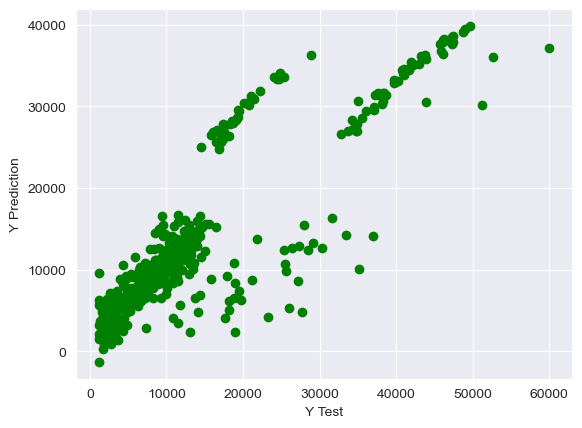

In [45]:
plt.scatter(y_test, y_pred, color='green')
plt.xlabel('Y Test')
plt.ylabel('Y Prediction')

# 5. Evaluating Model

In [48]:
print("Intercept: ", model.intercept_)
print("Coefficients: ", model.coef_)

Intercept:  -10709.927927997549
Coefficients:  [  237.20387597   -38.95375356   318.94009287   529.26911808
 23461.1350995   -456.94411541]


In [50]:
from sklearn import metrics
print("MAE: ", metrics.mean_absolute_error(y_test, y_pred))
print("MSE: ", metrics.mean_squared_error(y_test, y_pred))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE:  4448.753507988243
MSE:  41183311.21316552
RMSE:  6417.4224742621955


In [52]:
print("R2 Score: ", metrics.r2_score(y_test, y_pred))

R2 Score:  0.7497518500786089


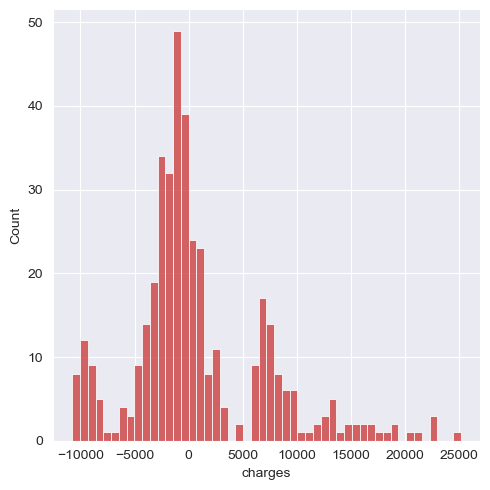

In [61]:
sns.displot(y_test-y_pred, bins=50)

In [54]:
coef_ins = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
coef_ins

,Coefficient
age,237.203876
sex,-38.953754
bmi,318.940093
children,529.269118
smoker,23461.135099
region,-456.944115


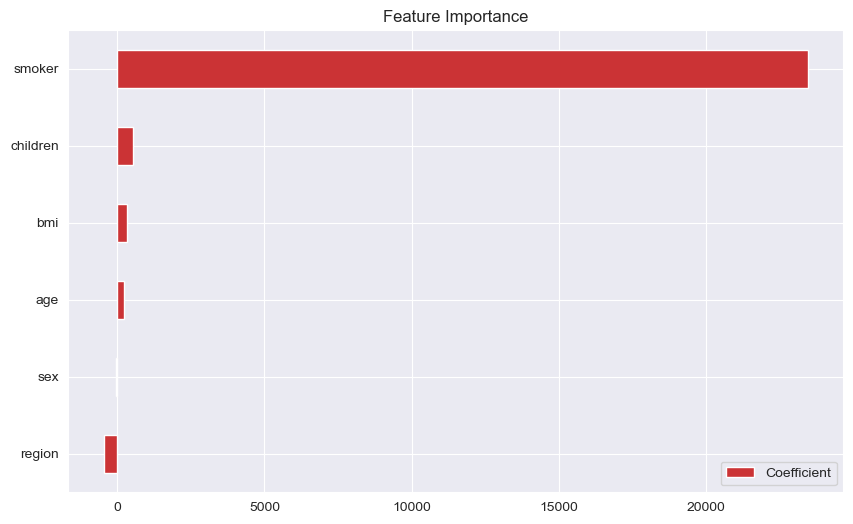

In [56]:
coef_ins.sort_values(by='Coefficient').plot(kind='barh', figsize=(10, 6), title="Feature Importance")
plt.show()

# 6. Predict New Data

In [59]:
new_data = pd.DataFrame([X.mean().values], columns=X.columns)

predicted_charges = model.predict(new_data)
print("Your charges are: ", predicted_charges[0])

Your charges are:  13041.60236249874
